In [1]:
# Convert email into feature vector
# Create Test & Training Set
# Add Hyperparameters to:
# - Strip email headers
# - Convert to lowercase
# - Remove punctuation
# - Replace urls with "URL"
# - Replace numbers with "NUMBER"
# - Perform Stemming (trim word endings with library)

In [1]:
import pandas as pd
import numpy as np
import os
import email
import email.policy
from bs4 import BeautifulSoup

inputdir = 'hamnspam/'
hamdir = inputdir + "ham"
spamdir = inputdir + 'spam'
os.listdir(inputdir)

['ham', 'spam']

## Data Exploration

In [2]:
ham_filenames = [name for name in sorted(os.listdir(hamdir)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(spamdir)) if len(name) > 20]

In [3]:
print('Amount of ham files:', len(ham_filenames))
print('Amount of spam files:', len(spam_filenames))    
print('Spam to Ham Ratio:',len(spam_filenames)/len(ham_filenames))

Amount of ham files: 2551
Amount of spam files: 501
Spam to Ham Ratio: 0.1963935711485692


In [4]:
def load_email(is_spam, filename):
    directory = spamdir if is_spam else hamdir
    with open(os.path.join(directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]
    
# change the line below to see the content for an email, e.g., ham_emails[27]
testEmail = <Your Code>

In [5]:
print('Header Field Names:',testEmail.keys())
print('\n\n')
print('Message Field Values:',testEmail.values())
print('\n\n')
print('Message Content:',testEmail.get_content())

Header Field Names: ['Return-Path', 'Delivered-To', 'Received', 'Received', 'Received', 'Received', 'Delivered-To', 'Received', 'Received', 'Received', 'Received', 'Received', 'Received', 'From', 'To', 'Cc', 'Subject', 'In-Reply-To', 'References', 'MIME-Version', 'Content-Type', 'Message-Id', 'X-Loop', 'Sender', 'Errors-To', 'X-Beenthere', 'X-Mailman-Version', 'Precedence', 'List-Help', 'List-Post', 'List-Subscribe', 'List-Id', 'List-Unsubscribe', 'List-Archive', 'Date']



Message Field Values: ['<exmh-workers-admin@example.com>', 'zzzz@localhost.netnoteinc.com', 'from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)', 'from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)', 'from listman.example.com (listman.example.com [66.187.233.211]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP 

In [106]:
testEmailContent = testEmail.get_content()
print(type(testEmailContent), type(testEmail))


<class 'str'> <class 'email.message.EmailMessage'>


In [7]:
# change the line below to print out the content for a specific header's information, e.g., testEmail['From']
testEmail[<Your Code>]

'Re: New Sequences Window'

In [8]:
# print out the content for a specific email, e.g., spam_emails[9].get_content()
print(<Your Code>)

A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 
 
  GET IN WITH THE FOUNDERS! 
The MAJOR PLAYERS are on This ONE
For ONCE be where the PlayerS are
This is YOUR Private Invitation

EXPERTS ARE CALLING THIS THE FASTEST WAY 
TO HUGE CASH FLOW EVER CONCEIVED
Leverage $1,000 into $50,000 Over and Over Again

THE QUESTION HERE IS:
YOU EITHER WANT TO BE WEALTHY 
OR YOU DON'T!!!
WHICH ONE ARE YOU?
I am tossing you a financial lifeline and for your sake I 
Hope you GRAB onto it and hold on tight For the Ride of youR life!

Testimonials

Hear what average people are doing their first few days:
�We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL
 �I'm a single mother in FL and I've received 12,000 in the last 4 days.� D. S. in FL
�I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!� L.L. in KY
�I didn't have the money, so I found myself a partner to work this with. We have received $4,000 over the last 2 days

## Turning Emails into plaintext


In [9]:
from collections import Counter

def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

ham_structure = structures_counter(ham_emails)
spam_structure = structures_counter(spam_emails)

In [10]:
ham_structure.most_common()

[('text/plain', 2453),
 ('multipart(text/plain, application/pgp-signature)', 72),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [11]:
spam_structure.most_common()

[('text/plain', 222),
 ('text/html', 181),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 19),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [12]:
for email in spam_emails:
    if get_email_structure(email) == 'text/html':
        testEmail = email
        break

print(testEmail.get_content())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<HTML><HEAD>
<META content="text/html; charset=windows-1252" http-equiv=Content-Type>
<META content="MSHTML 5.00.2314.1000" name=GENERATOR></HEAD>
<BODY><!-- Inserted by Calypso -->
<TABLE border=0 cellPadding=0 cellSpacing=2 id=_CalyPrintHeader_ rules=none 
style="COLOR: black; DISPLAY: none" width="100%">
  <TBODY>
  <TR>
    <TD colSpan=3>
      <HR color=black noShade SIZE=1>
    </TD></TR></TD></TR>
  <TR>
    <TD colSpan=3>
      <HR color=black noShade SIZE=1>
    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso --><FONT 
color=#000000 face=VERDANA,ARIAL,HELVETICA size=-2><BR></FONT></TD></TR></TABLE><!-- End Calypso --><FONT color=#ff0000 
face="Copperplate Gothic Bold" size=5 PTSIZE="10">
<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=#ff0000 
face="Copperplate Gothic Bold" size=5 PTSIZE="10">
<CENTER>Why Spend More Than You Have To?
<CENTER><FONT color=#ff0000 face="Copp

In [13]:
def html_to_plain(email):
    try:
        soup = BeautifulSoup(email.get_content(), 'html.parser')
        return soup.text.replace('\n\n','')
    except:
        return "empty"

print(html_to_plain(testEmail))


Save up to 70% on Life Insurance.
Why Spend More Than You Have To?Life Quote Savings
Ensuring your 
      family's financial security is very important. Life Quote Savings makes 
      buying life insurance simple and affordable. We Provide FREE Access to The 
      Very Best Companies and The Lowest Rates.Life Quote Savings is FAST, EASY and 
            SAVES you money! Let us help you get started with the best values in 
            the country on new coverage. You can SAVE hundreds or even thousands 
            of dollars by requesting a FREE quote from Lifequote Savings. Our 
            service will take you less than 5 minutes to complete. Shop and 
            compare. SAVE up to 70% on all types of Life insurance! Click Here For Your 
            Free Quote!Protecting your family is the best investment you'll ever 
          make!
If you are in receipt of this email 
      in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If you 
      resi

In [14]:
def email_to_plain(email):
    struct = get_email_structure(email)
    for part in email.walk():
        partContentType = part.get_content_type()
        if partContentType not in ['text/plain','text/html']:
            continue
        try:
            partContent = part.get_content()
        except: # in case of encoding issues
            partContent = str(part.get_payload())
        if partContentType == 'text/plain':
            return partContent
        else:
            return html_to_plain(part)

print(email_to_plain(ham_emails[42]))
print(email_to_plain(spam_emails[42]))

Joseph S. Barrera III wrote:

> Chris Haun wrote:
>
>> A LifeGem is a certified, high quality diamond created from the 
>> carbon of your loved one as a memorial to their unique and wonderful 
>> life.
>
>
> Why wait until you're dead? I'm sure there's enough carbon in
> the fat from your typical liposuction job to make a decent diamond.
>
> - Joe
>
Oh, hell - what about excrement? I'd love to be able to say - No, the 
sun doesn't shine out of my ass, but there's the occasional diamond. ;-).

Owen


http://xent.com/mailman/listinfo/fork



New Page 1
VIAGRA
WITHOUT
A DOCTORS VISIT!!
CLICK
HERE
*Other
Top Medications also available!!
*We
have Doctors on call around the country to view
your information and quickly approve your order.
*Totally
Discreet System allows you to order today and
enjoy your medication tomorrow in most cases.
*Finally
you can try the wonder drug Viagra that
has swept the World without the embarrassment of
having to visit your Doctor and explain your condition!!
TO

In [15]:
import nltk

stemmer = nltk.PorterStemmer()
for word in ("Working", "Work", "Works", "Worked"):
        print(word, "=>", stemmer.stem(word))

Working => work
Work => work
Works => work
Worked => work


In [17]:
# import url_extractor
# url_extractor = urlextract.URLExtract()
# print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pqs"))


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
# - Strip email headers
# - Convert to lowercase
# - Remove punctuation
# - Replace urls with "URL"
# - Replace numbers with "NUMBER"
# - Perform Stemming (trim word endings with library)
class EmailToWords(BaseEstimator, TransformerMixin):
    def __init__(self, stripHeaders=True, lowercaseConversion = True, punctuationRemoval = True, 
                 urlReplacement = True, numberReplacement = True, stemming = True):
        self.stripHeaders = stripHeaders
        self.lowercaseConversion = lowercaseConversion
        self.punctuationRemoval = punctuationRemoval
        self.urlReplacement = urlReplacement
        #self.url_extractor = urlextract.URLExtract()
        self.numberReplacement = numberReplacement
        self.stemming = stemming
        self.stemmer = nltk.PorterStemmer()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_to_words = []
        for email in X:
            text = email_to_plain(email)
            if text is None:
                text = 'empty'
            if self.lowercaseConversion:
                text = text.lower()
                
            #if self.urlReplacement:
                #urls = self.url_extractor.find_urls(text)
                #for url in urls:
                #    text = text.replace(url, 'URL')   
                    
            if self.punctuationRemoval:
                text = text.replace('.','')
                text = text.replace(',','')
                text = text.replace('!','')
                text = text.replace('?','')
                
            word_counts = Counter(text.split())
            if self.stemming:
                stemmed_word_count = Counter()
                for word, count in word_counts.items():
                    stemmed_word = self.stemmer.stem(word)
                    stemmed_word_count[stemmed_word] += count
                word_counts = stemmed_word_count
            X_to_words.append(word_counts)
        return np.array(X_to_words)

In [19]:
X_few = ham_emails[:3]
Xwordcounts = EmailToWords().fit_transform(X_few)
Xwordcounts

array([Counter({'the': 15, 'pick': 9, '-lbrace': 6, 'of': 5, '-rbrace': 5, 'i': 4, 'is': 4, '-list': 4, 'thi': 3, '+inbox': 3, '-subject': 3, 'ftp': 3, '-sequenc': 3, '18:19:04': 3, 'command': 3, 'delta$': 3, 'from': 3, 'error': 2, '18:19:03': 2, '4852-4852': 2, 'mercuri': 2, '1': 2, 'hit': 2, "that'": 2, 'come': 2, 'version': 2, 'use': 2, 'on': 2, 'and': 2, 'one': 2, 'date:': 1, 'wed': 1, '21': 1, 'aug': 1, '2002': 1, '10:54:46': 1, '-0500': 1, 'from:': 1, 'chri': 1, 'garrigu': 1, '<cwg-dated-103037728706fa6d@deepeddycom>': 1, 'message-id:': 1, '<10299452874797tmda@deepeddyvirciocom>': 1, '|': 1, "can't": 1, 'reproduc': 1, 'for': 1, 'me': 1, 'it': 1, 'veri': 1, 'repeat': 1, '(like': 1, 'everi': 1, 'time': 1, 'without': 1, 'fail)': 1, 'debug': 1, 'log': 1, 'happen': 1, 'pick_it': 1, '{exec': 1, '-rbrace}': 1, '{4852-4852': 1, 'mercury}': 1, 'exec': 1, 'ftoc_pickmsg': 1, '{{1': 1, 'hit}}': 1, 'mark': 1, 'tkerror:': 1, 'syntax': 1, 'in': 1, 'express': 1, '"int': 1, 'note': 1, 'if': 1, 'r

In [20]:
from scipy.sparse import csr_matrix

class WordCountToVector(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_word_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_word_count[word] += min(count, 10)
        self.most_common = total_word_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(self.most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [21]:
vocab_transformer = WordCountToVector(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(Xwordcounts)
X_few_vectors.toarray()

array([[177.,  15.,   2.,   5.,   1.,   9.,   1.,   4.,   3.,   0.,   3.],
       [ 89.,   5.,   3.,   3.,   2.,   0.,   3.,   2.,   2.,   0.,   2.],
       [196.,  16.,  10.,   5.,  10.,   0.,   4.,   1.,   2.,   7.,   1.]])

In [22]:
vocab_transformer.vocabulary_

{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'pick': 5,
 'a': 6,
 'is': 7,
 'from': 8,
 'man': 9,
 'thi': 10}

## Creating a Pipeline

In [93]:
from sklearn.pipeline import Pipeline

email_pipeline = Pipeline([
    ("Email to Words", EmailToWords()),
    ("Wordcount to Vector", WordCountToVector()),
])

## Training a Model

In [108]:
from sklearn.model_selection import cross_val_score, train_test_split

X = np.array(ham_emails + spam_emails)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print out the dtype of "y" and "y_test" to see if they are in the same type
print(<Your Code>)

object int32


<ipython-input-108-41914c34eab5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array(ham_emails + spam_emails)


In [109]:
# transform the emails to vector
X_augmented_train = email_pipeline.fit_transform(X_train)

# print out the dtype of "X_augmented_train" and "X" to see if they are in the same type
print(<Your Code>)

float64


Fit the logistic regression model with the assumption:
$P(Y=1|X=x)={\frac  {e^{{x'\beta }}}{1+e^{{x'\beta }}}}$

In [110]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# print(X_augmented_train.toarray())

# model = sm.Logit(y_train, X_augmented_train.toarray())
# results = model.fit(method="bfgs")
# print(results.summary())

log_clf = LogisticRegression(solver="liblinear", random_state=42)
print(log_clf)
score = cross_val_score(log_clf, X_augmented_train, y_train, cv=3)

score.mean()


LogisticRegression(random_state=42, solver='liblinear')


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9860704380999584

[[506  13]
 [ 77  15]]


<ipython-input-111-4dbd2607f03c>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = matrix_df.astype('float')/matrix_df.sum(axis=1)[:, np.newaxis]


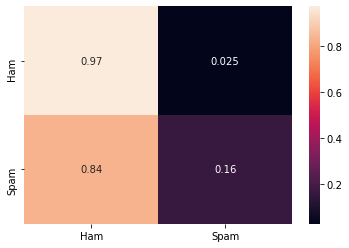

Precision: 53.57%
Recall: 16.30%


In [111]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# log_clf.fit(X_augmented_train, y_train)

X_augmented_test = email_pipeline.fit_transform(X_test)

model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(X_augmented_train, y_train)

# predict the valure of spam by using the "model" and take the "X_augmented_test" as input
y_pred = <Your Code>
cn_matrix = confusion_matrix(y_test, y_pred)
print(cn_matrix)

matrix_df = pd.DataFrame(cn_matrix, index=["Ham", "Spam"], columns=["Ham", "Spam"])
df = matrix_df.astype('float')/matrix_df.sum(axis=1)[:, np.newaxis]
sns.heatmap(df, annot=True)
plt.show()

# X_augmented_test = email_pipeline.transform(X_test)

# y_pred = model.predict(X_augmented_test)

# log_clf = LogisticRegression(solver="liblinear", random_state=42)
# log_clf.fit(X_augmented_train, y_train)


print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

### Understand the result with significant words

We use the p-value of the coefficient (the corresponding word contributes to the probability of the spam) to identify significant words. 
The steps are shown below:
 1. Get the words list from the email->workds->vector transform
 2. Select the words which have the p-value less than 0.05, which means it is significant in distinguishing the spams (whether it is a spam or not)

In [113]:

Xwordcounts = EmailToWords().fit_transform(X_train)
vocab_transformer = WordCountToVector()
X_few_vectors = vocab_transformer.fit_transform(Xwordcounts)
# np.array(vocab_transformer.vocabulary_)

In [114]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X_augmented_train, y_train)
print(len(pvalues), pvalues)
print(len(scores), scores)

1001 [0.00000000e+000 1.37086199e-085 9.06421105e-302 ... 7.12526134e-003
 4.97463893e-001 2.67616696e-004]
1001 [4.79801583e+03 3.84400150e+02 1.37867082e+03 ... 7.24111763e+00
 4.60342620e-01 1.32844488e+01]


In [59]:

vocs = list(vocab_transformer.vocabulary_.keys())
# print(vocs)
print(len(vocs))
# print(len(results.pvalues))
sig_voc = [vocs[i-1] for i, p in enumerate(pvalues[1:]) if p<0.05]
print("Significant Words: ", len(sig_voc), "/", len(vocs), sig_voc)

1000
Significant Words:  0.698 ['yourself', 'the', 'to', 'a', 'and', '>', 'in', 'is', 'i', 'that', 'it', 'for', 'you', 'on', 'be', 'not', 'are', 'as', 'from', 'but', 'or', 'at', 'if', 'your', 'an', 'my', 'by', 'all', 'can', 'do', 'get', 'they', '--', 'will', 'so', 'ha', 'mail', 'one', 'about', 'time', 'no', 'out', 'what', 'like', 'would', 'which', 'work', '2002', 'some', 'who', 'onli', "don't", 'messag', 'me', 'peopl', 'make', 'ani', 'when', 'been', 'email', "it'", 'than', 'then', 'wrote:', 'go', 'them', 'way', 'he', 'date:', 'file', 'think', 'hi', 'look', '_______________________________________________', "i'm", 'into', 'need', 'had', 'year', 'first', 'free', 'see', 'say', 'over', 'url:', 'us', 'were', 'should', 'even', 'know', 'problem', 'said', 'most', 'take', 'inform', 'right', 'find', '>>', 'thing', 'doe', 'system', 'where', 'good', 'these', 'group', 'am', 'day', 'mani', 'veri', 'compani', '|', 'well', 'pleas', 'give', 'call', "i'v", 'still', 'servic', 'befor', '1', 'packag', 'mon

### Bonus
Besides the above logistic regression model, you can try other methods to predict the spam also, e.g.:
1. Naive Bayes
2. K-Neighbors
3. Random Forest
4. etc.
Try one of the above methods and give your evaluation of the results

### References
1. [Spam Email Competetion](https://www.kaggle.com/veleon/ham-and-spam-dataset)
2. [Base code of Spam Email Classification](https://www.kaggle.com/veleon/spam-classification)